In [2]:
from san import *
import san
from decimal import Decimal
import pandas as pd
import datetime
import pickle # pip install pickle
import re
import os

In [3]:
b_age= pd.read_csv("https://raw.githubusercontent.com/LeoSu15/ACG7848-Group-Project/main/Bitcoin_AgeConsumed.csv")
b_dev=pd.read_csv("https://raw.githubusercontent.com/LeoSu15/ACG7848-Group-Project/main/Bitcoin_DevelopmentAct..csv")
b_mar=pd.read_csv("https://raw.githubusercontent.com/LeoSu15/ACG7848-Group-Project/main/Bitcoin_MarketCap.csv")
b_social=pd.read_csv("https://raw.githubusercontent.com/LeoSu15/ACG7848-Group-Project/main/Bitcoin_social_volume.csv")
b_volume=pd.read_csv("https://raw.githubusercontent.com/LeoSu15/ACG7848-Group-Project/main/Bitcoin_volume.csv")
b_return=pd.read_csv("https://raw.githubusercontent.com/LeoSu15/ACG7848-Group-Project/main/bitcoin_daily_return.csv")
df=b_return


In [10]:
df.rename(columns={"datetime": "Date"})

,Date,Price,lagprice,bit_return
0,2019-04-01T12:00:00.000Z,4158.183070,NaN,NaN
1,2019-04-02T00:00:00.000Z,4759.059581,4158.183070,0.144505
2,2019-04-02T12:00:00.000Z,4879.877828,4759.059581,0.025387
3,2019-04-03T00:00:00.000Z,4964.544821,4879.877828,0.017350
4,2019-04-03T12:00:00.000Z,4971.307741,4964.544821,0.001362
...,...,...,...,...
1457,2021-03-30T00:00:00.000Z,59319.615979,57750.199871,0.027176
1458,2021-03-30T12:00:00.000Z,58917.693045,59319.615979,-0.006776
1459,2021-03-31T00:00:00.000Z,58276.767673,58917.693045,-0.010878
1460,2021-03-31T12:00:00.000Z,58918.832714,58276.767673,0.011018


In [12]:
b_social.dropna(inplace=True)
b_dev.dropna(inplace=True)
b_mar.dropna(inplace=True)
b_age.dropna(inplace=True)
b_return.dropna(inplace=True)
#b_volume.drop(['Social Volume'], axis='columns', inplace=True)
b_volume.dropna(inplace=True)

In [13]:
finaldf = pd.merge(b_age,b_dev, how = "left", on = ['Date'])
finaldf = pd.merge(finaldf,b_mar, how = "left", on = ['Date'])
finaldf = pd.merge(finaldf,b_social, how = "left", on = ['Date'])
finaldf = pd.merge(finaldf,b_volume, how = "left", on = ['Date'])
finaldf = pd.merge(finaldf,b_return, how = "left", on = ['Date'])


In [14]:
finaldf.dropna(inplace=True)

finaldf

,Date,Age Consumed,Development Activity,Marketcap,Social Volume_x,Social Volume_y,Volume,Price,lagprice,bit_return
1,2019-04-02T00:00:00.000Z,1.627475e+07,37.36,8.598601e+10,13948.0,13948.0,1.637885e+10,4759.059581,4158.183070,0.144505
2,2019-04-03T00:00:00.000Z,1.505532e+07,37.93,8.762508e+10,13506.0,13506.0,2.096933e+10,4964.544821,4879.877828,0.017350
3,2019-04-04T00:00:00.000Z,6.391843e+06,40.21,8.677873e+10,9009.0,9009.0,2.189461e+10,4998.949713,4971.307741,0.005560
4,2019-04-05T00:00:00.000Z,1.326380e+07,41.50,8.879612e+10,8437.0,8437.0,1.778179e+10,5004.705702,4922.798788,0.016638
5,2019-04-06T00:00:00.000Z,3.367822e+06,41.36,8.921273e+10,7808.0,7808.0,1.571741e+10,5014.389855,5036.681100,-0.004426
...,...,...,...,...,...,...,...,...,...,...
727,2021-03-28T00:00:00.000Z,7.825438e+06,117.57,1.044447e+12,11023.0,11023.0,5.063633e+10,56054.570316,55973.510842,0.001448
728,2021-03-29T00:00:00.000Z,7.916118e+06,107.07,1.078088e+12,11912.0,11912.0,5.422941e+10,57883.078814,55950.745774,0.034536
729,2021-03-30T00:00:00.000Z,1.082356e+07,100.00,1.099940e+12,11918.0,11918.0,5.799719e+10,59319.615979,57750.199871,0.027176
730,2021-03-31T00:00:00.000Z,1.389860e+07,96.36,1.100017e+12,12523.0,12523.0,5.533288e+10,58276.767673,58917.693045,-0.010878


In [15]:
finaldf.to_csv("/Users/tong/Desktop/ACG/bitcoin_finaldf.csv",index=False)

In [16]:
#Additional regression in python
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

In [17]:
data = finaldf
X = data.iloc[:, 9].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 2].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

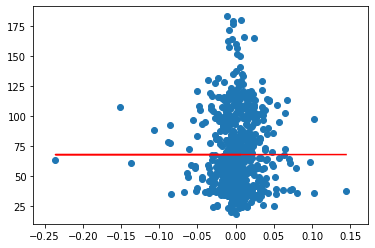

In [18]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()